# The Nordic Prior Knowledge Test in Programming
**Author**: [Sondre Sæther Bolland](https://www.uib.no/personer/Sondre.S%C3%A6ther.Bolland)

**Institution**: Department of Informatics, University of Bergen

**Email**: sondre.bolland@uib.no

## Introduction
The Nordic Prior Knowledge Test in Programming is a tool for assessing students’ programming skill. The test covers the fundamental elements of introductory programming taught at different universities and university colleges in Norway and Sweden. By testing the students in the concepts found in CS1 we aim for instructors to be better able to develop and adapt their courses to this new found prior knowledge.

This Notebook is a dynamic report of the results from 2024, designed to effectivly convey the findings of the test at the start of the semester. The (static) written report will be published sometime fall 2024 here: https://programmeringstesten.no/ 

### Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

### Data
Before using this notebook two python scripts need to be run. A requirement to run these scripts is to have the csv file with the original dataset: `total.csv`. This must be placed in the `data` folder in the main directory (where this Notebook is located).

`clean_data.py` cleans certain columns for ambigious data and renames columns for analysis.

`grade_submissions.py` grades each question based on the rubric (`rubric.json`).

In [4]:
!python clean_data.py
!python grade_submissions.py

Replace escape characters: dict_items([('&lt;', '<'), ('&gt;', '>'), ('&#61;', '='), ('&#34;', '"'), ('&#43;', '+')])
Replace all institution full names with their shorthand.
Replace all ambigious genders with standardized labels: ['m', 'f'] (other gender identities are not included)
2119 submissions.
Rename columns with simpler titles. Easier to use in analysis.
Removed all genders that are not in: ['m', 'f']. The other gender identities do not have a large enough sample size for valid statistical analysis.
Max score: 51.79999999999998
Submissions to be graded: 2119
Submissions graded.


### Dataset

In [450]:
# Specify the path of the data file
path = "data/"
filename = path + "results.csv"
df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")

# Remove all students who have taken a university level course
df = df[(df['UniversityExperience'] == 'Nei')]

### Filter the dataframe
Do you want to look at a specific subset of students?
Use the next cell to filter the students based on your criteria.

To reset the dataframe, simply run the cell above.

In [451]:
# Filter by institution
specific_institutions = ['UiB'] # 'UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU', 'OsloMet'
#df = df[(df['Institution'].isin(specific_institutions))]

In [452]:
# Filter out all non INF100 related study programs
inf100_studyprograms = ['Nanoteknologi, Bachelor', 'Datateknologi, Bachelor', 'Datasikkerhet, Bachelor', 'Bioinformatikk, Bachelor', 'Informatikk, Matematikk og Økonomi, Bachelor', 'Fysikk, Bachelor', 'Data science, Siv.ing.', 'Kognitiv vitenskap, Bachelor', 'Energi, Siv.ing.', 'Geofysikk, Bachelor', 'Anvendt matematikk, Bachelor', 'Geovitenskap, Bachelor', 'Kjemi, Bachelor', 'Matematikk, Bachelor', 'Statistikk og data science, Bachelor', 'Vær hav og klimafysikk, Bachelor', 'Havteknologi, Siv.ing.', 'Integrert masterprogram i aktuarfag og analyse', 'Informatikk, Årsstudium', 'Biologi, Bachelor', 'Geofag og informatikk, Bachelor', 'Molykelærbiologi, Bachelor', 'Havbruk, Siv.ing.', 'Medisinsk teknologi, Siv.ing.']
#df = df[(df['Studyprogram'].isin(inf100_studyprograms))]

In [453]:
# Filter out all non informatics students at UiB
informatics_studyprograms = ['Datateknologi, Bachelor', 'Datasikkerhet, Bachelor', 'Bioinformatikk, Bachelor', 'Informatikk, Matematikk og Økonomi, Bachelor', 'Data science, Siv.ing.', 'Informatikk, Årsstudium']
#df = df[(df['Studyprogram'].isin(informatics_studyprograms))]

In [454]:
# Filter by Graduate Year
specific_graduateyears = ['2023', '2024']
df = df[(df['GraduateYear'].isin(specific_graduateyears))]

In [455]:
# Filter by Gender
specific_genders = ['f', 'm', ' '] # 'f', 'm', ' '
#df = df[(df['Gender'].isin(specific_genders))]

## Demographics
See the background of the students. Note that there are a large number of submissions that are blank for some of the following items. This is due to the students submitting ambigious answers, which have not been labled correctly by `clean_data.py`.

In [456]:
# Total number of students
print(f"The dataset has {len(df['Total'])} student submissions.")

The dataset has 856 student submissions.



### Institutions

Institution
NTNU    388
UiB     155
UiS     142
UiO     123
HiOf     33
HVL      15
Name: count, dtype: int64


<Axes: ylabel='count'>

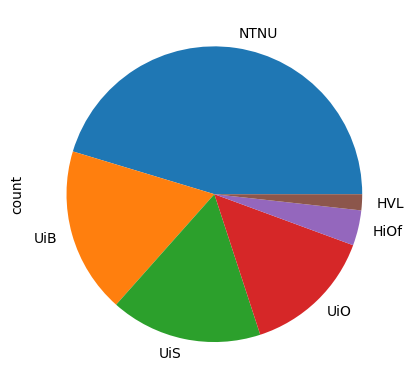

In [457]:
institutions = df.Institution.unique()

institution_column = "Institution"
print(df[institution_column].value_counts())
df[institution_column].value_counts().plot.pie()

### Study Program

Studyprogram
Annet                                           69
Geovitenskap, Bachelor                          19
Fysikk, Bachelor                                13
Havteknologi, Siv.ing.                          10
Datateknologi, Bachelor                          8
Datasikkerhet, Bachelor                          8
Matematikk, Bachelor                             6
Informatikk, Årsstudium                          5
Informatikk, Matematikk og Økonomi, Bachelor     2
Data science, Siv.ing.                           2
Geofysikk, Bachelor                              2
Nanoteknologi, Bachelor                          1
Kjemi, Bachelor                                  1
Kognitiv vitenskap, Bachelor                     1
Name: count, dtype: int64


<Axes: ylabel='count'>

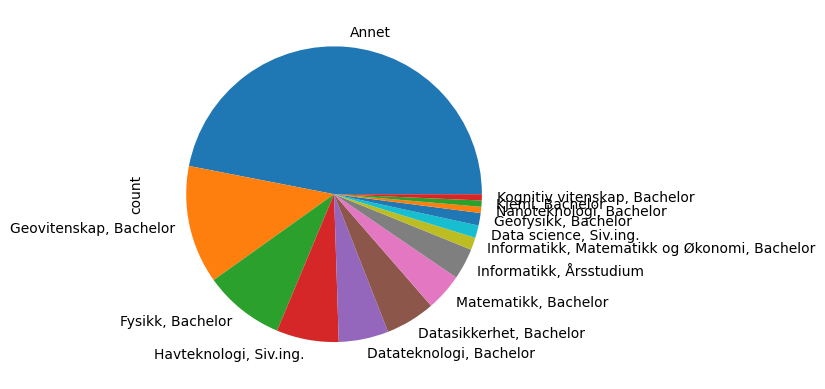

In [458]:
studyprogram = df.Studyprogram.unique()

studyprogram_column = "Studyprogram"
print(df[studyprogram_column].value_counts())
df[studyprogram_column].value_counts().plot.pie()

### Graduate Year

GraduateYear
2024    458
2023    398
Name: count, dtype: int64


<Axes: ylabel='count'>

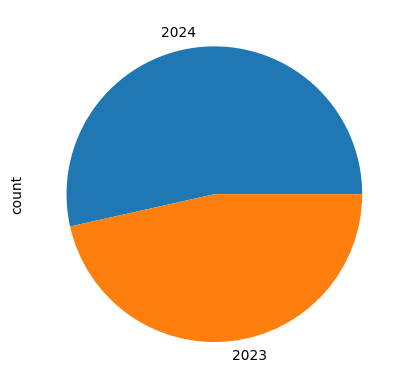

In [459]:
years = df.GraduateYear.unique()

graduateyear_column = "GraduateYear"
print(df[graduateyear_column].value_counts())
df[graduateyear_column].value_counts().plot.pie()

### Gender

Gender
m    501
f    299
      56
Name: count, dtype: int64
Gender
m    0.585280
f    0.349299
     0.065421
Name: proportion, dtype: float64


<Axes: ylabel='count'>

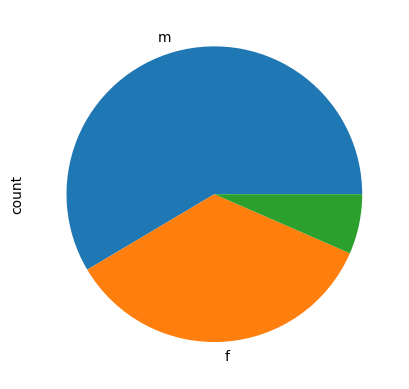

In [460]:
genders = df.Gender.unique()
gender_column = "Gender"

print(df[gender_column].value_counts())
print(df[gender_column].value_counts(normalize=True))
df[gender_column].value_counts().plot.pie()

## Educational Background
What experiences with programming do these students have? 

### Elective Programming Courses
During the secondary school phase, students have the option to take three elective courses in programming: *Information Technology 1* (IT1), *Information Technology 2* (IT2), and *Programming and Modelling X* (PMX). 

In [461]:
# Make new column for NO elective programming course
courses = ['Informasjonsteknologi 1 (IT1)', 'Informasjonsteknologi 2 (IT2)', 'Programmering og modellering X']
df_temp = df[(~df['IT1'].isin(courses))]
df_temp = df_temp[(~df_temp['IT2'].isin(courses))]
df_temp = df_temp[(~df_temp['PMX'].isin(courses))]
df_temp['NoElective'] = ~df_temp['IT1'].isin(courses)

df['NoElective'] = df_temp['NoElective']

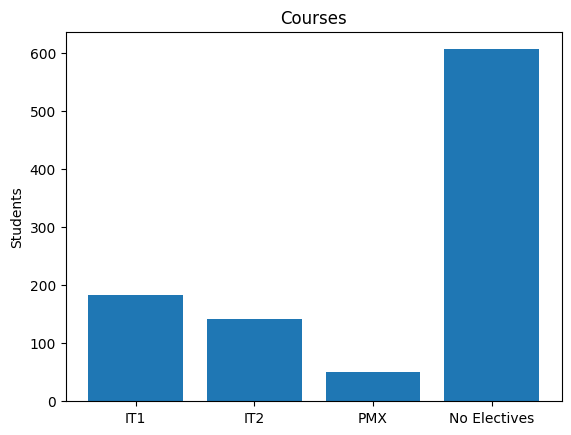

In [462]:
fig, ax = plt.subplots()

courses = ['IT1', 'IT2', 'PMX', 'No Electives']
n_it1 = df['IT1'].value_counts()['Informasjonsteknologi 1 (IT1)']
n_it2 = df['IT2'].value_counts()['Informasjonsteknologi 2 (IT2)']
n_pmx = df['PMX'].value_counts()['Programmering og modellering X']
n_noelectives = df['NoElective'].value_counts()[True]
counts = [n_it1, n_it2, n_pmx, n_noelectives]

ax.bar(courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Math Courses
The most common math courses available in secondary school are:
 * Practical Math 1 (1P)
 * Practical Math 2 (2P)
 * Theoretical Math 1 (1T)
 * Social Science Math 1 (S1)
 * Social Science Math 2 (S2)
 * Natural Science Math 1 (R1)
 * Natural Science Math 2 (R2)

The majority of students who took the test belonged to STEM fields, where the typical admission requirement includes S1 and S2 or R1 mathematics. Certain math-intensive study programs may also demand R2 mathematics. Notably, most students had completed the Natural Science Math courses (see plot below), which is the most advanced option.

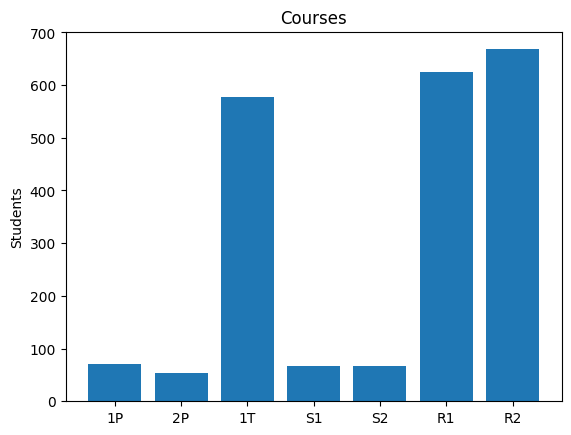

In [463]:
fig, ax = plt.subplots()

courses = ['1P', '2P', '1T', 'S1', 'S2', 'R1', 'R2']
gotten_courses = []
counts = []
for course in courses:
    try:
        count = df[course].value_counts()[course]
        counts.append(count)
        gotten_courses.append(course)
    except:
        continue

ax.bar(gotten_courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Experience outside of school
A source of programming knowledge is self-directed learning outside of formal education, where individuals independently explore the field, using resources like books and online materials. The following plot shows the distribution of students who report having at least 30 hours of outside experience with either block based or text based programming.

OutsideExperience
Nei    653
Ja     201
Name: count, dtype: int64
OutsideExperience
Nei    0.764637
Ja     0.235363
Name: proportion, dtype: float64


<Axes: ylabel='count'>

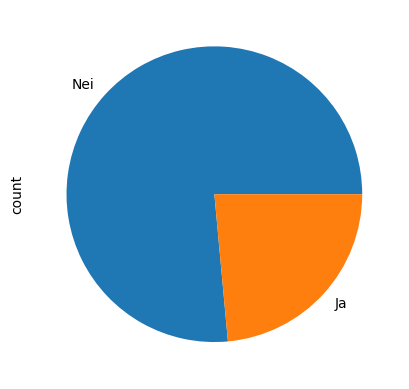

In [464]:
outside_column = "OutsideExperience"

print(df[outside_column].value_counts())
print(df[outside_column].value_counts(normalize=True))
df[outside_column].value_counts().plot.pie()

# Results
In this section of the report, the main results are presented before a review of the background the students have on the various study paths and what connection there is between background and results. Later we take a close look at how well they performed in specific programming tasks to understand their grasp of the different concepts.

In [465]:
# Configurations
bins = 25
edgecolor = 'red'
alpha = 0.5

## Main Result
A histogram of the total score of the students. Maximum score: 51.8.

Mean: 29.03
Standard deviation: 15.462


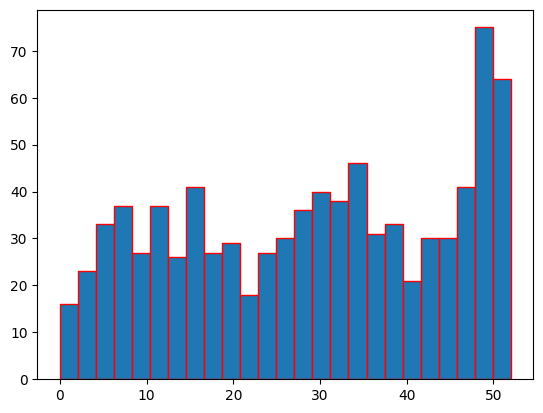

In [466]:
x = df['Total']

mean = df.loc[:, 'Total'].mean()
sd = df.loc[:, 'Total'].std()
print(f'Mean: {round(mean, 3)}')
print(f'Standard deviation: {round(sd, 3)}')


plt.hist(x, edgecolor=edgecolor, bins=bins, range=[0, 52])
plt.show() 

### Did the students find the test hard?
We asked the students to rate the test's difficulty on a Likert scale from 1 (very easy) to 7 (very hard)

<Axes: xlabel='difficulty'>

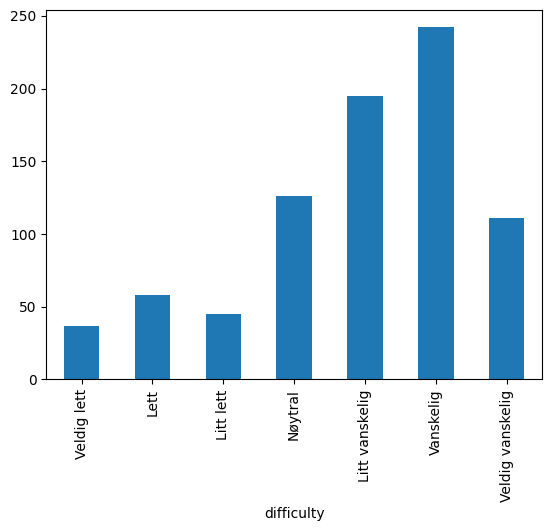

In [467]:
df['difficulty'].value_counts().loc[['Veldig lett', 'Lett', 'Litt lett', 'Nøytral', 'Litt vanskelig', 'Vanskelig', 'Veldig vanskelig']].plot.bar()

In [468]:
def compare_distributions(x, y, x_label, y_label):
    n = len(x)
    mean = x.mean()
    sd = x.std()
    print(f'N students in {x_label}: {n}')
    print(f'Mean of {x_label}: {round(mean, 3)}')
    print(f'Standard deviation of {x_label}: {round(sd, 3)}')
    print()

    n = len(y)
    mean = y.mean()
    sd = y.std()
    print(f'N students in {y_label}: {n}')
    print(f'Mean of {y_label}: {round(mean, 3)}')
    print(f'Standard deviation of {y_label}: {round(sd, 3)}')
    
    #plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, weights=np.ones(len(x)) / len(x), range=[0, 52])
    #plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, weights=np.ones(len(y)) / len(y), range=[0, 52])
    plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, range=[0, 52])
    plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, range=[0, 52])
    #plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.legend(loc='upper right')
    plt.show()

## Prior Programming Experience in Secondary School
In the initial segment of the test, we inquired with the students regarding their prior exposure to
programming before to commencing their higher education studies.

### Graduation Year
The educational reforms outlined in LK20 were introduced in the year 2020, resulting in programming becoming a compulsory component solely for those students who graduated in 2023 and onward.

N students in 2023 and 2024: 856
Mean of 2023 and 2024: 29.03
Standard deviation of 2023 and 2024: 15.462

N students in before 2023: 0
Mean of before 2023: nan
Standard deviation of before 2023: nan


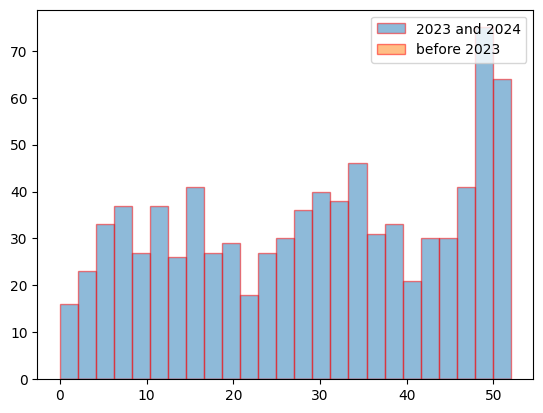

In [469]:
years = df['GraduateYear']
x = df[(years.isin(['2023', '2024']))]['Total']
y = df[(~years.isin(['2023', '2024']))]['Total']
y = y[~np.isnan(y)]

x_label = '2023 and 2024'
y_label = 'before 2023'

compare_distributions(x, y, x_label, y_label)

### How many students do not need introductory programming?
The students who perform very well on this test might not need CS1. If we set an (arbitrary) point threshold we can get an indication of how many students can perhaps move on to more advanced courses.

In [470]:
threshold = 48
x = df[df['Total'] > threshold]
n = len(x)
percentage = round((n/len(df))*100, 2)

print(f'Number of students with a score over {threshold}: {n} ({percentage}%)')

Number of students with a score over 48: 138 (16.12%)


### Gender

N students in women: 299
Mean of women: 23.124
Standard deviation of women: 14.782

N students in men: 501
Mean of men: 32.456
Standard deviation of men: 14.802


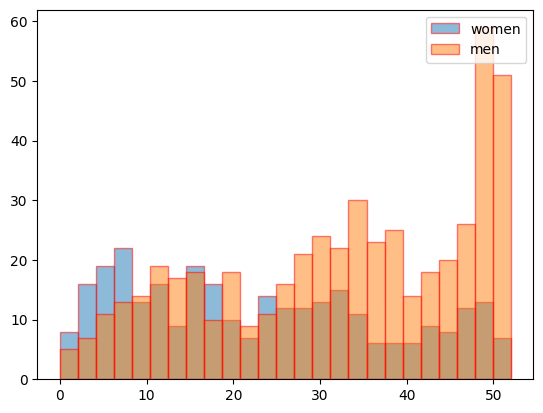

In [471]:
x = df[(df['Gender'] == 'f')]['Total']
y = df[(df['Gender'] == 'm')]['Total']

x_label = 'women'
y_label = 'men'

compare_distributions(x, y, x_label, y_label)

# Programming Tasks
Each task featured in the test pertained to a designated concept category. The following cells show the number of correct answers and the most common answers for each task.

## Correctness rate for each concept category
Below you can find the percentage of accurate responses achieved by the students for each concept.

Note that performance within each category may not exclusively reflect the students’ mastery of that programming concept. Variability in task difficulty plays a substantial role, with some tasks naturally being easier than others, irrespective of the underlying concept.

In [472]:
def correctnes_rate(columns, category, task_weight=1):
    correct_answer_rate = 0
    for column in columns:
        points_column = column + "_points"
        task_mean = df.loc[:, points_column].mean()
        correct_answer_rate += task_mean
    correct_answer_rate /= len(columns)*task_weight
    print(f'{category:15s} {correct_answer_rate*100:3.2f} %')

In [473]:
print("The students have the following average correctness rate for each concept category:")

# Datatypes
datatype_columns = ['datatypes1', 'datatypes2', 'datatypes3', 'datatypes4']
correctnes_rate(datatype_columns, "Datatypes")

# Booleans
boolean_columns = ["100 == 100", "2 > 7", "(10 + 3) >= 13", "(10*2) < 9", "(1 + 3) < (2*3)", "(10.3 + 9) == (10.3 + 10)",	"100 != 100", "(5 < 7) and (4 > 5)", "(5 < 7) or (4 > 5)", "(3 < 7) and (7 < 9)", "(3 < 7) or (7 < 9)", "not (100 != 100)", "True != True", "True and False", "True or False" , "True and True", "True or True", "not (True != True)", "n < 10", "100 == n", "(n < 7) and (4 > n)", "(n < 7) or (4 > n)", "n <= 5", "not (n < 10)"]
correctnes_rate(boolean_columns, "Booleans", task_weight=0.2)

# Variables
variable_columns = ["Variables1a", "Variables1b", "Variables2a", "Variables2b", "Variables3a", "Variables3b", "Variables4a", "Variables4b", "Variables5a", "Variables5b", "Variables5c", "Variables6a", "Variables6b", "Variables6c"]
correctnes_rate(variable_columns, "Variables")

# Conditionals
conditional_columns = ["Conditionals1", "Conditionals2", "Conditionals3", "Conditionals4"]
correctnes_rate(conditional_columns, "Conditionals")

# Loops
loop_columns = ["Loops1", "Loops2", "Loops3", "Loops4", "Loops5", "Loops6", "Loops7"]
correctnes_rate(loop_columns, "Loops")

# Lists
list_columns = ["Lists1", "Lists2", "Lists3a", "Lists3b"]
correctnes_rate(list_columns, "Lists")

# Functions
function_columns = ["Functions1", "Functions2", "Functions3", "Functions4", "Functions5", "Functions6", "Functions7", "Functions8", "Functions9"]
correctnes_rate(function_columns, "Functions")

The students have the following average correctness rate for each concept category:
Datatypes       66.30 %
Booleans        71.61 %
Variables       66.71 %
Conditionals    70.41 %
Loops           42.04 %
Lists           44.51 %
Functions       31.13 %


## Tasks
To gain a deeper understanding of the students’ knowledge and comprehension of specific programming concepts, it is important to analyze their performance on these concepts. 

In [474]:
def print_task_result(task_column, df, n_answers=5, verbose_correct_answers=True):
    '''
    Print number of correct (1) and incorrect (0) responses.
    Print the top 5 most common answers.
    '''
    if verbose_correct_answers:
        task_point_column = task_column + "_points"
        print("Number of correct responses:")
        print(df[task_point_column].value_counts())
        print()
    
    print(f"Top {n_answers} most common answers:")
    try:
        print(df[task_column].value_counts()[:n_answers])
    except:
        print(df[task_column].value_counts())

# Datatypes
What datatype do the following variables have?
```python
a = 123
b = 1.23
c = '123'
d = [1, 2, 3]
```

In [475]:
print_task_result("datatypes1", df, 6, True)
print()
print_task_result("datatypes2", df, 6, True)
print()
print_task_result("datatypes3", df, 6, True)
print()
print_task_result("datatypes4", df, 6, True)

Number of correct responses:
datatypes1_points
1    528
0    328
Name: count, dtype: int64

Top 6 most common answers:
datatypes1
int             528
Jeg vet ikke    174
str              64
float            53
bool             17
list             15
Name: count, dtype: int64

Number of correct responses:
datatypes2_points
1    550
0    306
Name: count, dtype: int64

Top 6 most common answers:
datatypes2
float           550
Jeg vet ikke    169
int              58
str              47
bool             19
list              6
Name: count, dtype: int64

Number of correct responses:
datatypes3_points
1    470
0    386
Name: count, dtype: int64

Top 6 most common answers:
datatypes3
str             470
Jeg vet ikke    252
int              45
bool             44
float            30
list              6
Name: count, dtype: int64

Number of correct responses:
datatypes4_points
1    722
0    134
Name: count, dtype: int64

Top 6 most common answers:
datatypes4
list            722
Jeg vet ikke    105

# Operators

### Operators 1
What is the value of `result`?
```python
a = 12
result = a + a
```

In [476]:
print_task_result("Operators1", df, 4, True)

Number of correct responses:
Operators1_points
1    768
0     88
Name: count, dtype: int64

Top 4 most common answers:
Operators1
24.0            768
I don't know     31
12.0             14
1212.0            7
Name: count, dtype: int64


### Operators 2
What is the value of `result`?
```python
a = 12
b = 1.23 

result = b + a
```

In [477]:
print_task_result("Operators2", df, 4, True)

Number of correct responses:
Operators2_points
1    665
0    191
Name: count, dtype: int64

Top 4 most common answers:
Operators2
13.23           665
I don't know     56
12.23             4
1.2312            4
Name: count, dtype: int64


### Operators 3
What is the value of `result`?
```python
c = '123'
result = c + c
```

In [478]:
print_task_result("Operators3", df, 4, True)

Number of correct responses:
Operators3_points
0    509
1    347
Name: count, dtype: int64

Top 4 most common answers:
Operators3
123123.0        347
I don't know    111
246.0            57
123.0             4
Name: count, dtype: int64


### Operators 4
What is printed here?
```python
n = 0
n = n + 1
n = n + 1

print(n)
```

In [479]:
print_task_result("Operators4", df, 4, True)

Number of correct responses:
Operators4_points
1    672
0    184
Name: count, dtype: int64

Top 4 most common answers:
Operators4
2.0             672
I don't know     68
1.0              29
3.0              17
Name: count, dtype: int64


### Operators 5
What is printed here?
```python
n = 'b'
n = n + 'c'
n = n + 'a'

print(n)
```

In [480]:
print_task_result("Operators5", df, 4, True)

Number of correct responses:
Operators5_points
0    518
1    338
Name: count, dtype: int64

Top 4 most common answers:
Operators5
bca             330
I don't know    200
'bca'             9
abc               9
Name: count, dtype: int64


# Variables

### Variables 1
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
```

In [481]:
print_task_result("Variables1a", df)
print_task_result("Variables1b", df)

Number of correct responses:
Variables1a_points
1    630
0    226
Name: count, dtype: int64

Top 5 most common answers:
Variables1a
20.0    630
10.0     52
1.0       2
15.0      1
10.2      1
80.0      1
30.0      1
Name: count, dtype: int64
Number of correct responses:
Variables1b_points
1    632
0    224
Name: count, dtype: int64

Top 5 most common answers:
Variables1b
20.0            632
I don't know    170
10.0             44
2.0               2
15.0              1
Name: count, dtype: int64


### Variables 2
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
```

In [482]:
print_task_result("Variables2a", df)
print_task_result("Variables2b", df)

Number of correct responses:
Variables2a_points
1    608
0    248
Name: count, dtype: int64

Top 5 most common answers:
Variables2a
10.0    608
20.0     42
2.0       2
30.0      1
0.0       1
1.0       1
80.0      1
Name: count, dtype: int64
Number of correct responses:
Variables2b_points
1    587
0    269
Name: count, dtype: int64

Top 5 most common answers:
Variables2b
10.0            587
I don't know    200
20.0             62
1.0               1
0.0               1
Name: count, dtype: int64


### Variables 3
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
b = a
```

In [483]:
print_task_result("Variables3a", df)
print_task_result("Variables3b", df)

Number of correct responses:
Variables3a_points
1    592
0    264
Name: count, dtype: int64

Top 5 most common answers:
Variables3a
20.0    592
10.0     38
29.0      1
1.0       1
0.0       1
15.0      1
30.0      1
Name: count, dtype: int64
Number of correct responses:
Variables3b_points
1    522
0    334
Name: count, dtype: int64

Top 5 most common answers:
Variables3b
20.0            522
I don't know    216
10.0            105
2.0               1
0.0               1
Name: count, dtype: int64


### Variables 4
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
a = b
```

In [484]:
print_task_result("Variables4a", df)
print_task_result("Variables4b", df)

Number of correct responses:
Variables4a_points
1    539
0    317
Name: count, dtype: int64

Top 5 most common answers:
Variables4a
10.0    539
20.0     77
1.0       1
40.0      1
30.0      1
Name: count, dtype: int64
Number of correct responses:
Variables4b_points
1    565
0    291
Name: count, dtype: int64

Top 5 most common answers:
Variables4b
10.0            565
I don't know    224
20.0             51
2.0               1
60.0              1
Name: count, dtype: int64


### Variables 5
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = b
b = c
```

In [485]:
print_task_result("Variables5a", df)
print_task_result("Variables5b", df)
print_task_result("Variables5c", df)

Number of correct responses:
Variables5a_points
1    576
0    280
Name: count, dtype: int64

Top 5 most common answers:
Variables5a
20.0    576
30.0     35
10.0     20
1.0       2
Name: count, dtype: int64
Number of correct responses:
Variables5b_points
1    602
0    254
Name: count, dtype: int64

Top 5 most common answers:
Variables5b
30.0    602
20.0     14
10.0     11
2.0       2
15.0      2
3.0       1
60.0      1
Name: count, dtype: int64
Number of correct responses:
Variables5c_points
1    596
0    260
Name: count, dtype: int64

Top 5 most common answers:
Variables5c
30.0            596
I don't know    215
20.0             18
10.0              8
3.0               2
Name: count, dtype: int64


### Variables 6
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = c
b = a
c = b
```

In [486]:
print_task_result("Variables6a", df)
print_task_result("Variables6b", df)
print_task_result("Variables6c", df)

Number of correct responses:
Variables6a_points
1    576
0    280
Name: count, dtype: int64

Top 5 most common answers:
Variables6a
30.0    576
20.0     20
10.0     12
6.0       1
5.0       1
Name: count, dtype: int64
Number of correct responses:
Variables6b_points
1    491
0    365
Name: count, dtype: int64

Top 5 most common answers:
Variables6b
30.0    491
10.0    104
20.0     12
60.0      1
Name: count, dtype: int64
Number of correct responses:
Variables6c_points
1    479
0    377
Name: count, dtype: int64

Top 5 most common answers:
Variables6c
30.0            479
I don't know    229
20.0             93
10.0             34
60.0              1
Name: count, dtype: int64


## Booleans

### Booleans 1
What do these boolean expressions evaluate to?

In [487]:
print_task_result("100 == 100", df, 3, False)
print()
print_task_result("2 > 7", df, 3, False)
print()
print_task_result("(10 + 3) >= 13", df, 3, False)
print()
print_task_result("(10*2) < 9", df, 3, False)
print()
print_task_result("(1 + 3) < (2*3)", df, 3, False)
print()
print_task_result("(10.3 + 9) == (10.3 + 10)", df, 3, False)

Top 3 most common answers:
100 == 100
TRUE            769
Jeg vet ikke     62
FALSE            17
Name: count, dtype: int64

Top 3 most common answers:
2 > 7
FALSE           808
Jeg vet ikke     22
TRUE             17
Name: count, dtype: int64

Top 3 most common answers:
(10 + 3) >= 13
TRUE            707
FALSE            96
Jeg vet ikke     44
Name: count, dtype: int64

Top 3 most common answers:
(10*2) < 9
FALSE           791
TRUE             29
Jeg vet ikke     25
Name: count, dtype: int64

Top 3 most common answers:
(1 + 3) < (2*3)
TRUE            783
FALSE            36
Jeg vet ikke     29
Name: count, dtype: int64

Top 3 most common answers:
(10.3 + 9) == (10.3 + 10)
FALSE           753
Jeg vet ikke     71
TRUE             25
Name: count, dtype: int64


### Booleans 2
What do these boolean expressions evaluate to?

In [488]:
print_task_result("100 != 100", df, 3, False)
print()
print_task_result("(5 < 7) and (4 > 5)", df, 3, False)
print()
print_task_result("(5 < 7) or (4 > 5)", df, 3, False)
print()
print_task_result("(3 < 7) and (7 < 9)", df, 3, False)
print()
print_task_result("(3 < 7) or (7 < 9)", df, 3, False)
print()
print_task_result("not (100 != 100)", df, 3, False)

Top 3 most common answers:
100 != 100
FALSE           552
Jeg vet ikke    261
TRUE             33
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) and (4 > 5)
FALSE           718
Jeg vet ikke    104
TRUE             24
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) or (4 > 5)
TRUE            536
Jeg vet ikke    154
FALSE           154
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) and (7 < 9)
TRUE            722
Jeg vet ikke    102
FALSE            16
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) or (7 < 9)
TRUE            595
Jeg vet ikke    146
FALSE           104
Name: count, dtype: int64

Top 3 most common answers:
not (100 != 100)
TRUE            416
Jeg vet ikke    374
FALSE            56
Name: count, dtype: int64


### Booleans 3
What do these boolean expressions evaluate to?

In [489]:
print_task_result("True != True", df, 3, False)
print()
print_task_result("True and False", df, 3, False)
print()
print_task_result("True or False", df, 3, False)
print()
print_task_result("True and True", df, 3, False)
print()
print_task_result("True or True", df, 3, False)
print()
print_task_result("not (True != True)", df, 3, False)

Top 3 most common answers:
True != True
FALSE           469
Jeg vet ikke    332
TRUE             42
Name: count, dtype: int64

Top 3 most common answers:
True and False
FALSE           422
Jeg vet ikke    357
TRUE             61
Name: count, dtype: int64

Top 3 most common answers:
True or False
TRUE            467
Jeg vet ikke    326
FALSE            45
Name: count, dtype: int64

Top 3 most common answers:
True and True
TRUE            492
Jeg vet ikke    294
FALSE            54
Name: count, dtype: int64

Top 3 most common answers:
True or True
TRUE            397
Jeg vet ikke    308
FALSE           134
Name: count, dtype: int64

Top 3 most common answers:
not (True != True)
Jeg vet ikke    414
TRUE            355
FALSE            71
Name: count, dtype: int64


### Booleans 4
Given the variable `n = 5`, what do these boolean expressions evaluate to?

In [490]:
print_task_result("n < 10", df, 3, False)
print()
print_task_result("100 == n", df, 3, False)
print()
print_task_result("(n < 7) and (4 > n)", df, 3, False)
print()
print_task_result("(n < 7) or (4 > n)", df, 3, False)
print()
print_task_result("n <= 5", df, 3, False)
print()
print_task_result("not (n < 10)", df, 3, False)

Top 3 most common answers:
n < 10
TRUE            755
FALSE            49
Jeg vet ikke     42
Name: count, dtype: int64

Top 3 most common answers:
100 == n
FALSE           735
Jeg vet ikke     93
TRUE             17
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) and (4 > n)
FALSE           713
Jeg vet ikke     78
TRUE             50
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) or (4 > n)
TRUE            577
FALSE           148
Jeg vet ikke    113
Name: count, dtype: int64

Top 3 most common answers:
n <= 5
TRUE            692
Jeg vet ikke     85
FALSE            68
Name: count, dtype: int64

Top 3 most common answers:
not (n < 10)
FALSE           488
Jeg vet ikke    255
TRUE             97
Name: count, dtype: int64


## Conditionals

### Conditionals 1
What does this code snippet print?

```python
if 2 > 7:
    print(1)
```

In [491]:
print_task_result("Conditionals1", df)

Number of correct responses:
Conditionals1_points
1    689
0    167
Name: count, dtype: int64

Top 5 most common answers:
Conditionals1
Ingenting       689
1               100
Jeg vet ikke     60
Name: count, dtype: int64


### Conditionals 2
What does this code snippet print?

```python
if 100 != 100:
    print(1)
else:
    print(2)
```

In [492]:
print_task_result("Conditionals2", df)

Number of correct responses:
Conditionals2_points
1    530
0    326
Name: count, dtype: int64

Top 5 most common answers:
Conditionals2
2               530
Jeg vet ikke    215
1                63
1 og 2           25
Ingenting        15
Name: count, dtype: int64


### Conditionals 3
What does this code snippet print?

```python
if (10*2) < 9:
    print(1)
elif 100 == 100:
    print(2)
else:
    print(3)
```

In [493]:
print_task_result("Conditionals3", df)

Number of correct responses:
Conditionals3_points
1    607
0    249
Name: count, dtype: int64

Top 5 most common answers:
Conditionals3
2               607
Jeg vet ikke    107
2 og 3           51
1 og 2           24
1                22
Name: count, dtype: int64


### Conditionals 4
What does this code snippet print?

```python
if 100 == 100:
    print(1)
if (1 + 3) < (2*3):
    print(2)
else:
    print(3)
```

In [494]:
print_task_result("Conditionals4", df)

Number of correct responses:
Conditionals4_points
1    585
0    271
Name: count, dtype: int64

Top 5 most common answers:
Conditionals4
1 og 2          585
Jeg vet ikke    111
1                72
1 og 3           24
1, 2 og 3        21
Name: count, dtype: int64


## Loops

### Loops 1
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 1

print(n)
```

In [495]:
print_task_result("Loops1", df)

Number of correct responses:
Loops1_points
0    448
1    408
Name: count, dtype: int64

Top 5 most common answers:
Loops1
10.0            408
9.0             124
I don't know    109
1.0              80
123456789.0      60
Name: count, dtype: int64


### Loops 2
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 2

print(n)
```

In [496]:
print_task_result("Loops2", df)

Number of correct responses:
Loops2_points
0    475
1    381
Name: count, dtype: int64

Top 5 most common answers:
Loops2
10.0            381
I don't know    114
8.0             111
2.0              78
2468.0           60
Name: count, dtype: int64


### Loops 3
What does this code snippet print?

```python
n = 100
while n < 10:
    n = n + 2

print(n)
```

In [497]:
print_task_result("Loops3", df)

Number of correct responses:
Loops3_points
1    550
0    306
Name: count, dtype: int64

Top 5 most common answers:
Loops3
100             550
I don't know    184
0                38
102              20
98                5
Name: count, dtype: int64


### Loops 4
What does this code snippet print?

```python
n = 0
while (n < 7) and (4 > n):
    n = n + 1

print(n)
```

In [498]:
print_task_result("Loops4", df)

Number of correct responses:
Loops4_points
0    507
1    349
Name: count, dtype: int64

Top 5 most common answers:
Loops4
4.0             349
I don't know    188
3.0              94
1.0              55
0.0              48
Name: count, dtype: int64


### Loops 5
What does this code snippet print?

```python
n = 0
ls = [1, 1, 3]
for e in ls:
    n = n + e

print(n)
```

In [499]:
print_task_result("Loops5", df)

Number of correct responses:
Loops5_points
0    534
1    322
Name: count, dtype: int64

Top 5 most common answers:
Loops5
I don't know    441
5.0             322
0.0              23
1.0              10
3.0               9
Name: count, dtype: int64


### Loops 6
What does this code snippet print?

```python
n = 0
ls = [-1, 4, -3, 0, -10, 5]
for e in ls:
    if e > 0:
        n = n + e

print(n)
```

In [500]:
print_task_result("Loops6", df)

Number of correct responses:
Loops6_points
0    580
1    276
Name: count, dtype: int64

Top 5 most common answers:
Loops6
I don't know    468
9.0             276
0.0              26
5.0               8
-14.0             8
Name: count, dtype: int64


## Lists

### Lists 1
What does this code snippet print?

```python
ls = [10, 20, 30]
print(ls[1])
```

In [501]:
print_task_result("Lists1", df)

Number of correct responses:
Lists1_points
0    523
1    333
Name: count, dtype: int64

Top 5 most common answers:
Lists1
20.0            333
I don't know    252
10.0            230
102030.0         17
40.0              2
Name: count, dtype: int64


### Lists 2
What does this code snippet print?

```python
ls = [10, 20, 30]
ls[1] = ls[1] + 5

print(ls[1])
```

In [502]:
print_task_result("Lists2", df)

Number of correct responses:
Lists2_points
0    523
1    333
Name: count, dtype: int64

Top 5 most common answers:
Lists2
25.0            333
I don't know    272
15.0            208
152535.0          7
10.0              4
Name: count, dtype: int64


### Lists 3
What does this code snippet print?

```python
a = [10, 20, 30]
b = [5, 15, 25]

b[1] = a[1] + b[1]

print(a)
print(b)
```

In [503]:
print_task_result("Lists3a", df)
print_task_result("Lists3b", df)

Number of correct responses:
Lists3a_points
1    555
0    301
Name: count, dtype: int64

Top 5 most common answers:
Lists3a
[10, 20, 30]    555
Jeg vet ikke    223
[15, 35, 55]     12
[5, 15, 25]      12
[10, 35, 30]      6
Name: count, dtype: int64
Number of correct responses:
Lists3b_points
0    553
1    303
Name: count, dtype: int64

Top 5 most common answers:
Lists3b
Jeg vet ikke    313
[5, 35, 25]     303
[15, 35, 55]    133
[5, 15, 25]      49
[10, 35, 30]     14
Name: count, dtype: int64


## Functions

### Functions 1
What does this code snippet print?

```python
def f(a, b):
    return a + b

print(f(5, 10))
```

In [504]:
print_task_result("Functions1", df)

Number of correct responses:
Functions1_points
1    524
0    332
Name: count, dtype: int64

Top 5 most common answers:
Functions1
15.0            524
I don't know    286
5.1              11
510.0             5
5678910.0         1
Name: count, dtype: int64


### Functions 2
What does this code snippet print?

```python
def f(a):
    if a:
        return 1
    else:
        return 2

print(f(100 == 100))
```

In [505]:
print_task_result("Functions2", df)

Number of correct responses:
Functions2_points
0    514
1    342
Name: count, dtype: int64

Top 5 most common answers:
Functions2
I don't know    425
1.0             342
2.0              36
100.0            19
99.0              1
Name: count, dtype: int64


### Functions 3
What does this code snippet print?

```python
def f():
    if 100 == 100:
        return 1
    if (1 + 3) < (2*3):
        return 2
    else:
        return 3

print(f())
```

In [506]:
print_task_result("Functions3", df)

Number of correct responses:
Functions3_points
0    669
1    187
Name: count, dtype: int64

Top 5 most common answers:
Functions3
I don't know    404
1.0             187
12.0             97
1.2              53
2.0              32
Name: count, dtype: int64


### Functions 4
What does this code snippet print?

```python
def f(n, a):
    if a:
        n = n + 1
    return n

print(f(5, (10*2) < 9))
```

In [507]:
print_task_result("Functions4", df)

Number of correct responses:
Functions4_points
0    601
1    255
Name: count, dtype: int64

Top 5 most common answers:
Functions4
I don't know    513
5.0             255
6.0              19
0.0               4
5209.0            2
Name: count, dtype: int64


### Functions 5
What does this code snippet print?

```python
def f(n):
    while n < 10:
        n = n + 1
    return n

print(f(5))
```

In [508]:
print_task_result("Functions5", df)

Number of correct responses:
Functions5_points
0    560
1    296
Name: count, dtype: int64

Top 5 most common answers:
Functions5
I don't know    321
10.0            296
6.0              77
9.0              48
5.0              32
Name: count, dtype: int64


### Functions 6
What does this code snippet print?

```python
def f(s, ls):
    for e in ls:
        s = s + e
    return s

print(f('abc', ['x', 'y', 'z']))
```

In [509]:
print_task_result("Functions6", df)

Number of correct responses:
Functions6_points
0    642
1    214
Name: count, dtype: int64

Top 5 most common answers:
Functions6
I don't know    559
abcxyz          210
abc x y z         6
abcxabcyabcz      5
abc               4
Name: count, dtype: int64


### Functions 7
What does this code snippet print?

```python
def f(n, ls):
    return ls[n]

print(f(2, ['a', 'b', 'c']))
```

In [510]:
print_task_result("Functions7", df)

Number of correct responses:
Functions7_points
0    604
1    252
Name: count, dtype: int64

Top 5 most common answers:
Functions7
I don't know    512
c               245
b                21
C                 7
2                 4
Name: count, dtype: int64


### Functions 8
What does this code snippet print?

```python
def f(n, ls):
    return ls[1] + n

print(f(5, [10, 20, 30]))
```

In [511]:
print_task_result("Functions8", df)

Number of correct responses:
Functions8_points
0    590
1    266
Name: count, dtype: int64

Top 5 most common answers:
Functions8
I don't know    488
25.0            266
15.0             35
152535.0          4
65.0              3
Name: count, dtype: int64


### Functions 9
What does this code snippet print?

```python
def f(n, ls):
    for e in ls:
        ls[n] = ls[n] + e
    return ls[n]

print(f(1, [10, 20, 30]))
```

In [512]:
print_task_result("Functions9", df)

Number of correct responses:
Functions9_points
0    794
1     62
Name: count, dtype: int64

Top 5 most common answers:
Functions9
I don't know    564
80.0             90
90.0             62
21.0             13
23.0             13
Name: count, dtype: int64


# Programming Concept Dependence
Many of the tasks utilize concepts tested in earlier tasks. To better understand how well 

In [513]:
import networkx as nx
import matplotlib.pyplot as plt

In [514]:
# Define the tasks and the which other task they depend on
tasks = {        
    'Conditionals1': {'2 > 7'},
    'Conditionals2': {'100 != 100'},
    'Conditionals3': {'(10*2) < 9', '100 == 100'},
    'Conditionals4': {'(1 + 3) < (2*3)', '100 == 100'},
    
    'Loops1': {'Operators4', 'n < 10'},
    'Loops2': {'Operators4', 'n < 10'},
    'Loops3': {'Operators4', 'n < 10'},
    'Loops4': {'Operators4', '(n < 7) and (4 > n)'},
    'Loops5': {},
    'Loops6': {'Conditionals1', 'Loops5'},
    'Loops7': {'Operators5', 'Loops5'},

    'Lists1': {},
    'Lists2': {'Lists1'},
    'Lists3a': {'Lists2'},
    'Lists3b': {'Lists2'},
    
    'Functions1': {'Operators1'},
    'Functions2': {'Conditionals1', '100 == 100'},
    'Functions3': {'Conditionals4'},
    'Functions4': {'Operators4', '(10*2) < 9', 'Conditionals1'},
    'Functions5': {'Loops1'},
    'Functions6': {'Loops7'},
    'Functions7': {'Lists1'},
    'Functions8': {'Lists2'},
    'Functions9': {'Lists3a', 'Lists3b', 'Loops5'},
}

In [515]:
# Graph
# Initialize a directed graph (DAG)
G = nx.DiGraph()

# Add all tasks as nodes
G.add_nodes_from(tasks.keys())

In [516]:
# Add nodes and edges to the graph based on dependencies
for task, dependencies in tasks.items():
    for dependency in dependencies:
        # Add an edge from each dependency to the task
        G.add_edge(dependency, task)

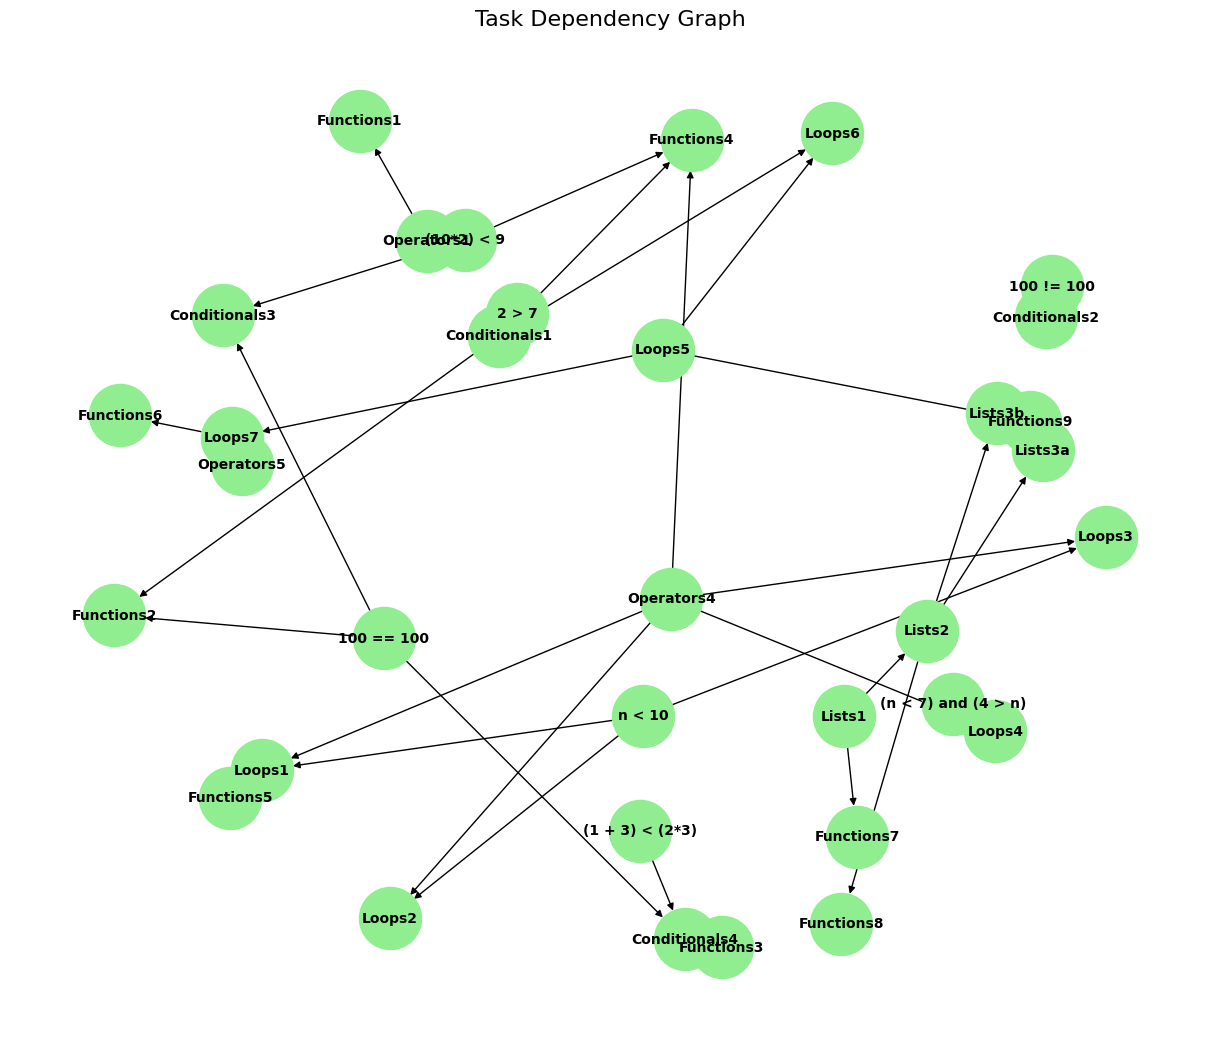

In [517]:
# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=10, font_weight='bold', arrows=True)
plt.title('Task Dependency Graph', fontsize=16)
plt.show()

In [518]:
def print_dependences(task):
    try:
        dependes = dependencies(task)
    except:
        dependes = []
    print(f'The task {task} has the following dependencies: {dependes}')
    n_correct = len(df[(df[task+'_points'] != 0)])
    print(f'Total number of students that managed task "{task}": {n_correct} / {len(df)}')

    if len(dependes) > 0: 
        print(f'How many students managed the dependent tasks?')
        for depend_task in dependes:
            n_correct = len(df[(df[depend_task+'_points'] != 0)])
            print(f'Total number of students that managed task "{depend_task}": {n_correct} / {len(df)}')
            task_df = df[(df[depend_task+'_points'] != 0)]

        print()
        n_correct = len(task_df[(task_df[task+'_points'] != 0)])
        n_total = len(task_df)
        print(f'Of all the students that managed all dependent tasks {n_correct} out of {n_total} managed "{task}"')
        print(f'This indicates that {n_total - n_correct} struggle with the non dependent concept in "{task}"')

def print_simple_dependeces(task):
    try:
        dependes = dependencies(task)
        if len(dependes) == 0:
            print('No dependence')
            return
    except:
        print('No dependence')
        return
        
    print(f'#### {task} ###')
    total_correct = len(df[(df[task+'_points'] != 0)])
    total_correct_percentage = round((total_correct / len(df)) * 100, 1)
    task_df = df
    for depend_task in dependes:
        task_df = task_df[(task_df[depend_task+'_points'] != 0)]
    dependent_correct = len(task_df)
    dependent_correct_percentage = round((dependent_correct / len(df)) * 100, 1)
    print('{:40s} {:50s} {:5d} {:5s}'.format('Correctly answered', task, total_correct, '('+str(total_correct_percentage)+'%)'))
    print('{:40s} {:50s} {:5d} {:5s}'.format('Correctly answered dependent tasks', str(dependes), dependent_correct, '('+str(dependent_correct_percentage)+'%)'))
    task_df = task_df[(task_df[task+'_points'] == 0)]
    task_percentage = round((len(task_df) / dependent_correct) * 100, 1)
    print('{:40s} {:50s} {:5d} {:5s}'.format('Managed dependent tasks, but failed', task, len(task_df), '('+str(task_percentage)+'%)'))
    

def dependencies(task):
    dependency_list = []
    for dependency in tasks[task]:
        try:
            dependency_list =+ dependencies(dependency)
        except:
            dependency_list.append(dependency)
    return dependency_list

In [519]:
for task in tasks:
    print_simple_dependeces(task)
    print()
    print()

#### Conditionals1 ###
Correctly answered                       Conditionals1                                        689 (80.5%)
Correctly answered dependent tasks       ['2 > 7']                                            808 (94.4%)
Managed dependent tasks, but failed      Conditionals1                                        138 (17.1%)


#### Conditionals2 ###
Correctly answered                       Conditionals2                                        530 (61.9%)
Correctly answered dependent tasks       ['100 != 100']                                       552 (64.5%)
Managed dependent tasks, but failed      Conditionals2                                         81 (14.7%)


#### Conditionals3 ###
Correctly answered                       Conditionals3                                        607 (70.9%)
Correctly answered dependent tasks       ['100 == 100', '(10*2) < 9']                         729 (85.2%)
Managed dependent tasks, but failed      Conditionals3                         